In [143]:
import pandas as pd
pd.set_option('float_format', '{:.2f}'.format)


import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
df = pd.read_excel('combined_eh_file.xlsx')
df.head()

,#CHROM,POS,ID,REF,STR_min,STR_max,QUAL,FILTER,INFO,FORMAT,META,Locus
0,chr1,57367043,.,C,12,13.00,.,PASS,END=57367118;REF=15;RL=75;RU=GAAAT;VARID=DAB1;...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,1/2:SPANNING/SPANNING:12/13:12-12/13-13:7/9:34...,DAB1
1,chr1,149390802,.,A,11,14.00,.,PASS,END=149390829;REF=9;RL=27;RU=GGC;VARID=NOTCH2N...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,1/2:SPANNING/SPANNING:11/14:11-11/14-14:22/11:...,NOTCH2NLC
2,chr2,96197066,.,C,10,12.00,.,PASS,END=96197121;REF=11;RL=55;RU=AAATG;VARID=STARD...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,1/2:SPANNING/SPANNING:10/12:10-10/12-12:15/13:...,STARD7
3,chr2,190880872,.,C,8,NaN,.,PASS,END=190880920;REF=16;RL=48;RU=GCA;VARID=GLS;RE...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,0/1:SPANNING/SPANNING:16/8:16-16/8-8:12/16:29/...,GLS
4,chr3,63912685,.,G,11,NaN,.,PASS,END=63912715;REF=10;RL=30;RU=CAG;VARID=ATXN7;R...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,0/1:SPANNING/SPANNING:10/11:10-10/11-11:6/3:8/...,ATXN7


In [145]:
df.shape

(11801, 12)

In [146]:
STR_max_df = df.groupby('Locus').STR_max.agg(['min', 'max', 'mean', 'median','std'])  
STR_max_df = STR_max_df.add_suffix('(STR_max)')

STR_max_df.reset_index(inplace=True)
STR_max_df.head()

,Locus,min(STR_max),max(STR_max),mean(STR_max),median(STR_max),std(STR_max)
0,AFF2,7.00,47.00,18.61,16.00,9.41
1,AR,15.00,33.00,25.26,26.00,2.85
2,ARX_1,NaN,NaN,NaN,NaN,NaN
3,ARX_2,7.00,117.00,63.11,51.00,29.57
4,ATN1,9.00,26.00,15.26,16.00,3.31


In [147]:
STR_min_df = df.groupby('Locus').STR_min.agg(['min', 'max', 'mean', 'median', 'std'])  
STR_min_df = STR_min_df.add_suffix('(STR_min)')

STR_min_df.reset_index(inplace=True)

STR_min_df.head()

,Locus,min(STR_min),max(STR_min),mean(STR_min),median(STR_min),std(STR_min)
0,AFF2,0,36,9.72,10.00,6.16
1,AR,9,32,22.46,22.00,3.11
2,ARX_1,7,116,17.49,15.00,18.17
3,ARX_2,0,106,32.12,39.00,23.65
4,ATN1,5,36,11.35,10.00,3.95


In [148]:
df = pd.merge(STR_min_df, STR_max_df,  on='Locus') 
df.head()

,Locus,min(STR_min),max(STR_min),mean(STR_min),median(STR_min),std(STR_min),min(STR_max),max(STR_max),mean(STR_max),median(STR_max),std(STR_max)
0,AFF2,0,36,9.72,10.00,6.16,7.00,47.00,18.61,16.00,9.41
1,AR,9,32,22.46,22.00,3.11,15.00,33.00,25.26,26.00,2.85
2,ARX_1,7,116,17.49,15.00,18.17,NaN,NaN,NaN,NaN,NaN
3,ARX_2,0,106,32.12,39.00,23.65,7.00,117.00,63.11,51.00,29.57
4,ATN1,5,36,11.35,10.00,3.95,9.00,26.00,15.26,16.00,3.31


In [149]:
stripy_df = pd.read_excel('STRipy_database_scrapped.xlsx')

In [150]:
merged_df = pd.merge(df, stripy_df, on='Locus')

In [151]:
merged_df.head()

,Locus,min(STR_min),max(STR_min),mean(STR_min),median(STR_min),std(STR_min),min(STR_max),max(STR_max),mean(STR_max),median(STR_max),std(STR_max),Disease,Onset,Inheritance,Normal,Intermediate,Pathogenic
0,AFF2,0,36,9.72,10.00,6.16,7.00,47.00,18.61,16.00,9.41,FRAXE mental retardation (FRAXE),Paediatric,X-linked recessive,6-25,-,≥200
1,AR,9,32,22.46,22.00,3.11,15.00,33.00,25.26,26.00,2.85,Spinal and bulbar muscular atrophy (SBMA),Adult,X-linked recessive,17-35,-,≥40
2,ARX_1,7,116,17.49,15.00,18.17,NaN,NaN,NaN,NaN,NaN,Developmental and epileptic encephalopathy-1 (...,Paediatric,X-linked recessive,16,-,≥23
3,ARX_1,7,116,17.49,15.00,18.17,NaN,NaN,NaN,NaN,NaN,X-linked mental retardation with or without se...,Paediatric,X-linked recessive,16,-,≥18
4,ARX_2,0,106,32.12,39.00,23.65,7.00,117.00,63.11,51.00,29.57,Developmental and epileptic encephalopathy-1 (...,Paediatric,X-linked recessive,12,-,≥20


In [202]:
df = pd.read_excel('combined_eh_file.xlsx')


In [203]:
#df[df['Locus'] =='RFC1']['Locus']

In [204]:
df.head()

,#CHROM,POS,ID,REF,STR_min,STR_max,QUAL,FILTER,INFO,FORMAT,META,Locus
0,chr1,57367043,.,C,12,13.00,.,PASS,END=57367118;REF=15;RL=75;RU=GAAAT;VARID=DAB1;...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,1/2:SPANNING/SPANNING:12/13:12-12/13-13:7/9:34...,DAB1
1,chr1,149390802,.,A,11,14.00,.,PASS,END=149390829;REF=9;RL=27;RU=GGC;VARID=NOTCH2N...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,1/2:SPANNING/SPANNING:11/14:11-11/14-14:22/11:...,NOTCH2NLC
2,chr2,96197066,.,C,10,12.00,.,PASS,END=96197121;REF=11;RL=55;RU=AAATG;VARID=STARD...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,1/2:SPANNING/SPANNING:10/12:10-10/12-12:15/13:...,STARD7
3,chr2,190880872,.,C,8,NaN,.,PASS,END=190880920;REF=16;RL=48;RU=GCA;VARID=GLS;RE...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,0/1:SPANNING/SPANNING:16/8:16-16/8-8:12/16:29/...,GLS
4,chr3,63912685,.,G,11,NaN,.,PASS,END=63912715;REF=10;RL=30;RU=CAG;VARID=ATXN7;R...,GT:SO:REPCN:REPCI:ADSP:ADFL:ADIR:LC,0/1:SPANNING/SPANNING:10/11:10-10/11-11:6/3:8/...,ATXN7


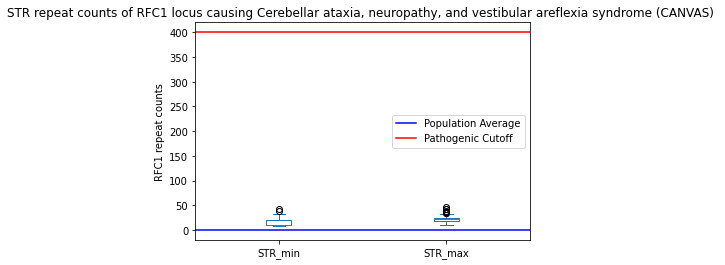

In [215]:
from cProfile import label


pd.DataFrame(df[df['Locus'] == 'RFC1'][['STR_min', 'STR_max']]).plot(kind='box')
plt.axhline(y = 0, color = 'b', linestyle = '-', label= 'Population Average')
plt.axhline(y = 400, color = 'r', linestyle = '-', label= 'Pathogenic Cutoff')
plt.ylabel('RFC1 repeat counts')
plt.legend()
plt.title('STR repeat counts of RFC1 locus causing Cerebellar ataxia, neuropathy, and vestibular areflexia syndrome (CANVAS) ')
plt.savefig('{}_{}.jpg'.format('RFC1', 'CANVAS'.replace('/', '') ), dpi=250,bbox_inches='tight')

plt.legend()

<AxesSubplot:ylabel='STR_max'>

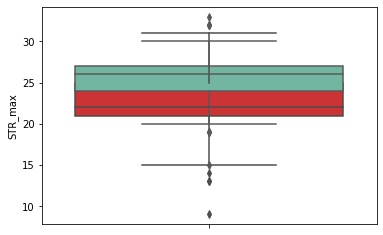

In [206]:
sns.boxplot(y = df[df['Locus'] == 'AR']['STR_min'], palette="Set1",   )
sns.boxplot(y= df[df['Locus'] == 'AR']['STR_max'], palette="Set2",   )
#plt.legend(labels=["STR Min","STR Max"])

<AxesSubplot:xlabel='Locus', ylabel='STR_min'>

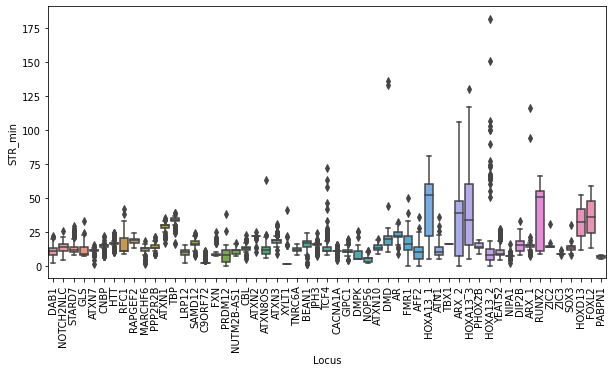

In [207]:
df [df['Locus'] == 'AR']['STR_min']

plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
sns.boxplot(data=df, x="Locus", y="STR_min")

In [208]:
# actual implementation for creating plots for all loci

eh_df_edited = pd.read_excel('Expansion_hunter_repeats_analysis_20220915.xlsx')
eh_df_edited.head(2)

,Locus,min(STR_min),max(STR_min),mean(STR_min),median(STR_min),std(STR_min),min(STR_max),max(STR_max),mean(STR_max),median(STR_max),...,Disease,Onset,Inheritance,Normal,Intermediate,Pathogenic,Normal_ave,Intermediate_ave,Diff_min,Diff_max
0,AFF2,0,36,9.72,10.00,6.16,7.00,47.00,18.61,16.00,...,FRAXE mental retardation (FRAXE),Paediatric,X-linked recessive,6-25,-,200.00,15.50,-,5.78,3.11
1,AR,9,32,22.46,22.00,3.11,15.00,33.00,25.26,26.00,...,Spinal and bulbar muscular atrophy (SBMA),Adult,X-linked recessive,17-35,-,40.00,26.00,-,3.54,0.74


AFF2 FRAXE mental retardation (FRAXE) 200.0 15.5
AR Spinal and bulbar muscular atrophy (SBMA) 40.0 26.0
ARX_1 Developmental and epileptic encephalopathy-1 (DEE1) 23.0 16.0
ARX_1 X-linked mental retardation with or without seizures (MRXARX) 18.0 16.0
ARX_2 Developmental and epileptic encephalopathy-1 (DEE1) 20.0 12.0
ARX_2 Partington syndrome (PRTS) 20.0 12.0
ARX_2 X-linked mental retardation with or without seizures (MRXARX) 23.0 12.0
ATN1 Dentatorubral-pallidoluysian atrophy (DRPLA) 49.0 15.0
ATXN1 Spinocerebellar ataxia 1 (SCA1) 39.0 19.0
ATXN10 Spinocerebellar ataxia 10 (SCA10) 800.0 19.5
ATXN2 Spinocerebellar ataxia 2 (SCA2) 35.0 22.0


C:\Users\RamKumarRuppaSurulin\AppData\Local\Temp\ipykernel_15340\445358219.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,15))


ATXN3 Spinocerebellar ataxia 3 (SCA3) 56.0 28.0
ATXN7 Spinocerebellar ataxia 7 (SCA7) 36.0 19.5
ATXN8OS Spinocerebellar ataxia 8 (SCA8) 80.0 19.5
BEAN1 Spinocerebellar ataxia 31 (SCA31) 500.0 0.0
C9ORF72 Amyotrophic lateral sclerosis and or frontotemporal dementia (FTDALS1) 24.0 10.0
CACNA1A Spinocerebellar ataxia 6 (SCA6) 21.0 11.0
CBL Jacobsen syndrome (JBS) 101.0 44.0
CNBP Myotonic dystrophy 2 (DM2) 55.0 29.0
DAB1 Spinocerebellar ataxia 37 (SCA37) 31.0 0.0
DIP2B Mental retardation, FRA12A type (MRFRA12A) 273.0 14.5
DMD Duchenne muscular dystrophy (DMD) 59.0 22.0
DMPK Myotonic dystrophy 1 (DM1) 50.0 19.5
FMR1 Fragile X tremor/ataxia syndrome (FXTAS) 127.5 23.0
FMR1 Fragile X Syndrome (FXS) 201.0 23.0
FOXL2 Blepharophimosis, ptosis, and epicanthus inversus syndrome (BPES) 19.0 14.0
FXN Friedreich ataxia (FRDA) 70.0 17.5
GIPC1 Oculopharyngodistal myopathy 2 (OPDM2) 73.0 22.0
GLS Glutaminase deficiency with impaired intellectual development and progressive ataxia (GD) 680.0 15.5
HOXA13_

<Figure size 1080x1080 with 0 Axes>

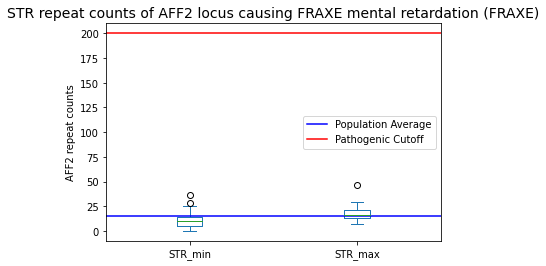

<Figure size 1080x1080 with 0 Axes>

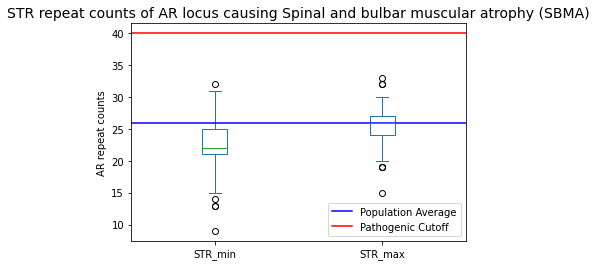

<Figure size 1080x1080 with 0 Axes>

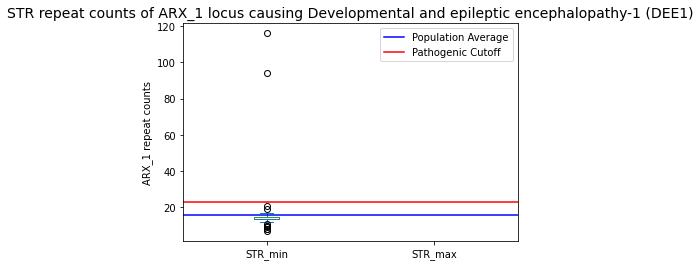

<Figure size 1080x1080 with 0 Axes>

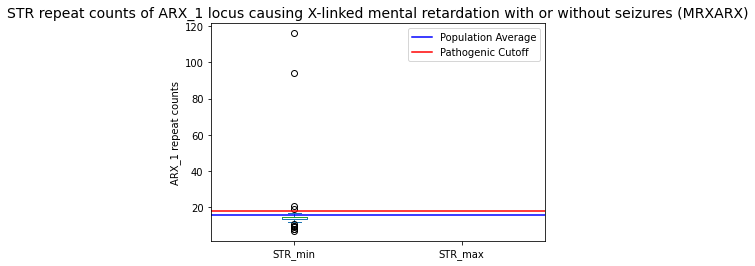

<Figure size 1080x1080 with 0 Axes>

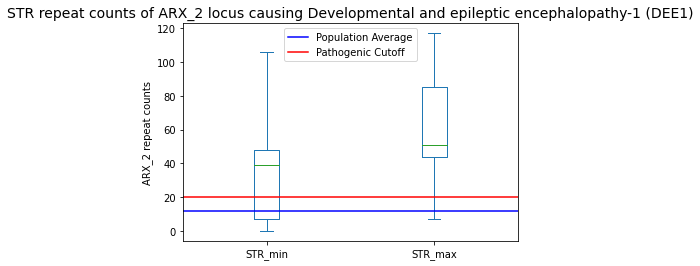

<Figure size 1080x1080 with 0 Axes>

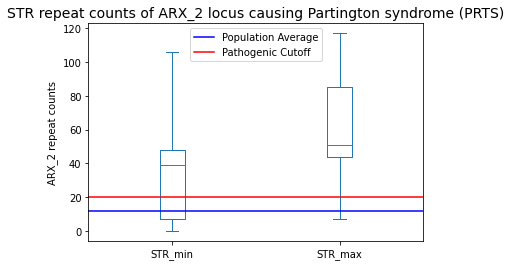

<Figure size 1080x1080 with 0 Axes>

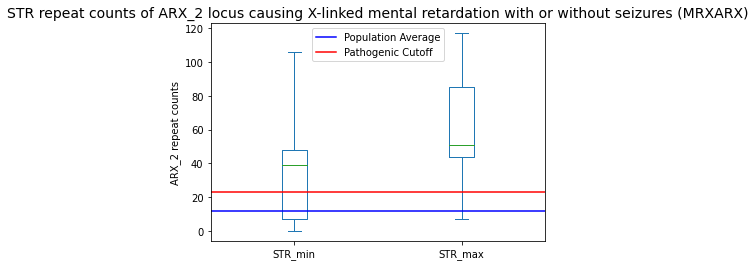

<Figure size 1080x1080 with 0 Axes>

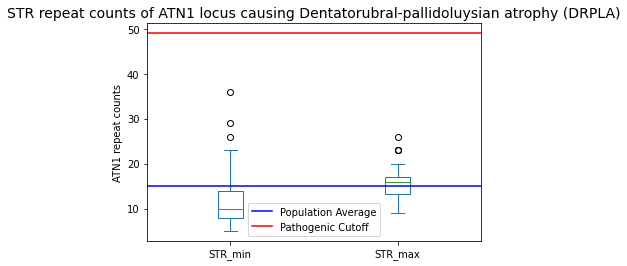

<Figure size 1080x1080 with 0 Axes>

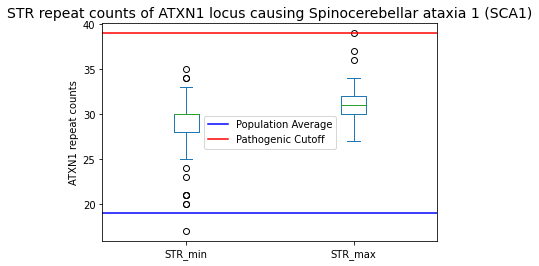

<Figure size 1080x1080 with 0 Axes>

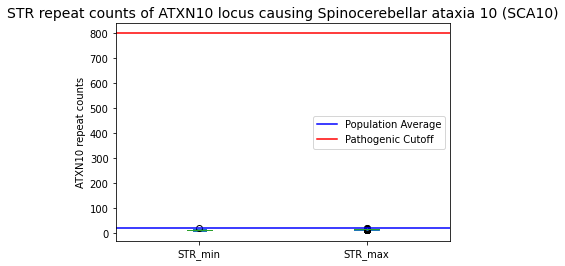

<Figure size 1080x1080 with 0 Axes>

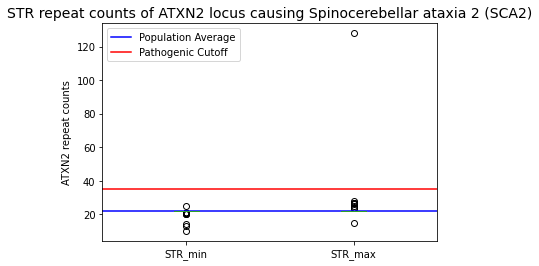

<Figure size 1080x1080 with 0 Axes>

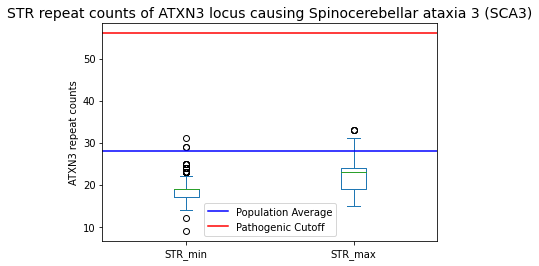

<Figure size 1080x1080 with 0 Axes>

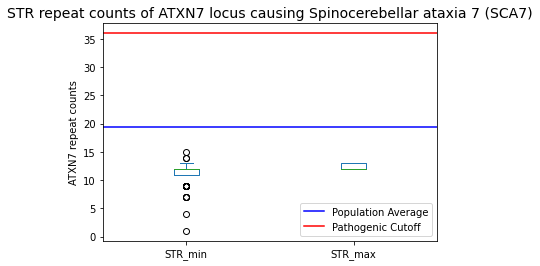

<Figure size 1080x1080 with 0 Axes>

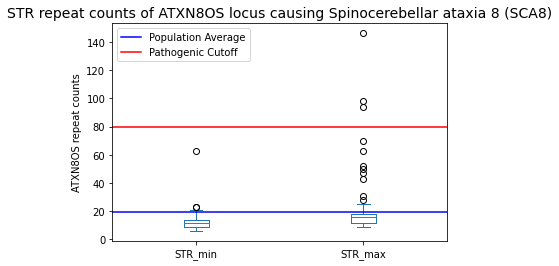

<Figure size 1080x1080 with 0 Axes>

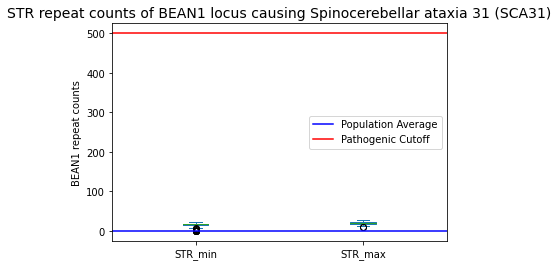

<Figure size 1080x1080 with 0 Axes>

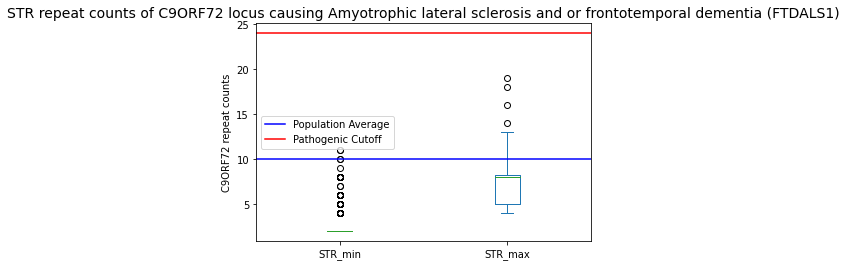

<Figure size 1080x1080 with 0 Axes>

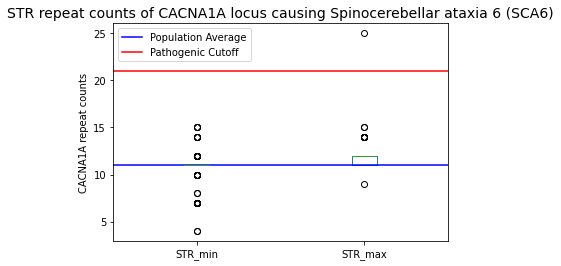

<Figure size 1080x1080 with 0 Axes>

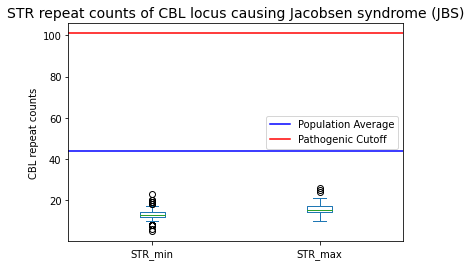

<Figure size 1080x1080 with 0 Axes>

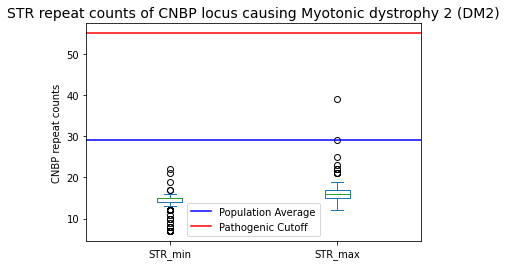

<Figure size 1080x1080 with 0 Axes>

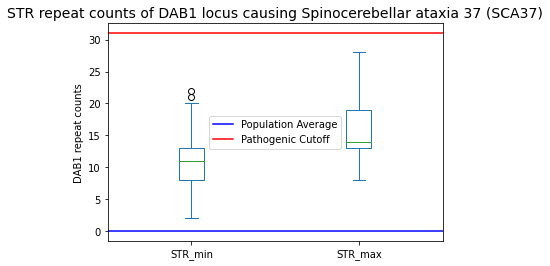

<Figure size 1080x1080 with 0 Axes>

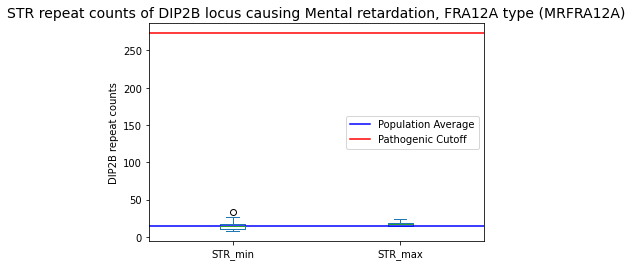

<Figure size 1080x1080 with 0 Axes>

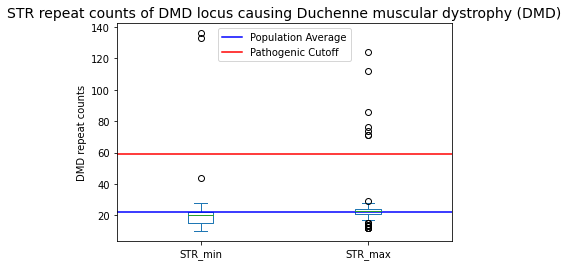

<Figure size 1080x1080 with 0 Axes>

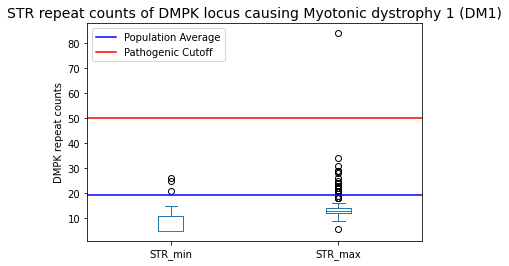

<Figure size 1080x1080 with 0 Axes>

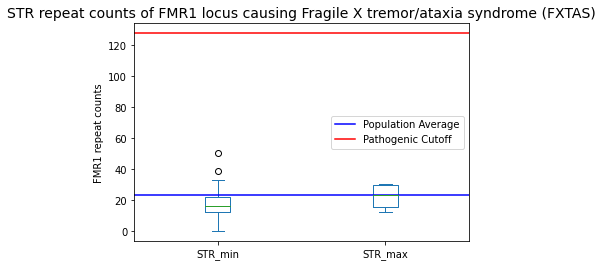

<Figure size 1080x1080 with 0 Axes>

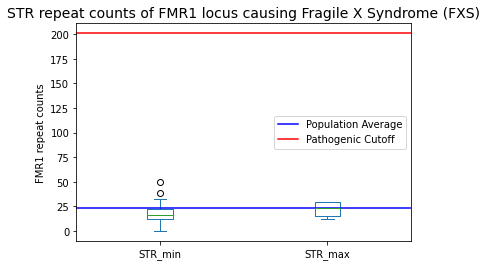

<Figure size 1080x1080 with 0 Axes>

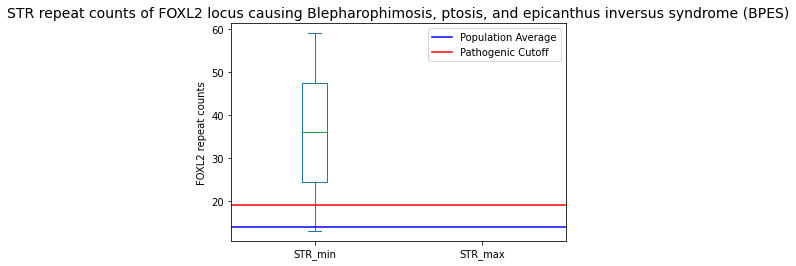

<Figure size 1080x1080 with 0 Axes>

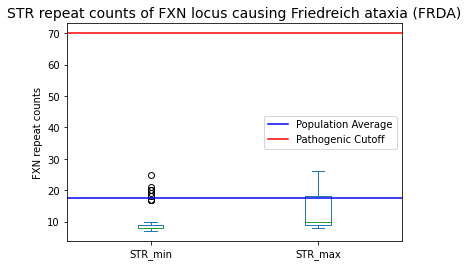

<Figure size 1080x1080 with 0 Axes>

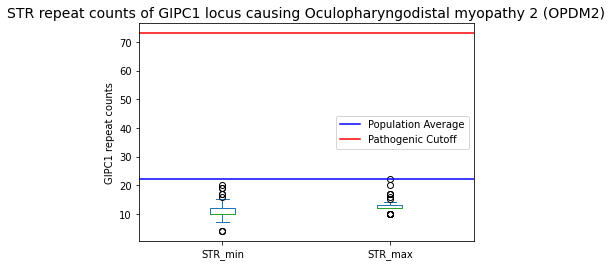

<Figure size 1080x1080 with 0 Axes>

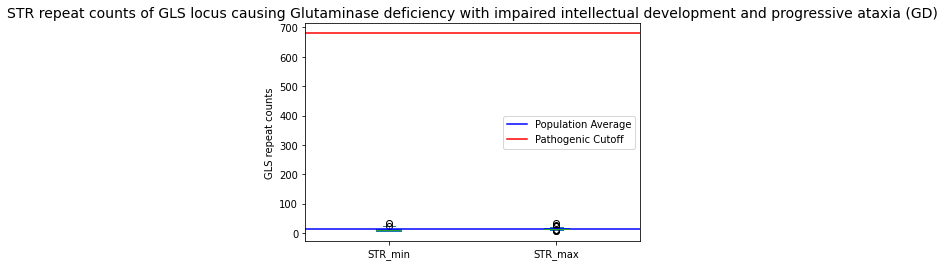

<Figure size 1080x1080 with 0 Axes>

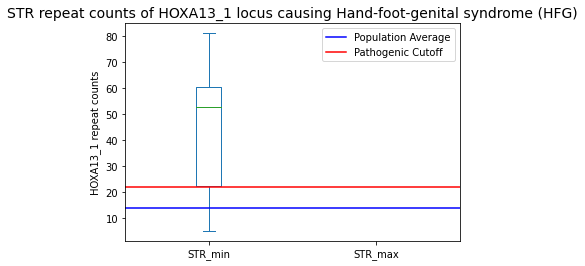

<Figure size 1080x1080 with 0 Axes>

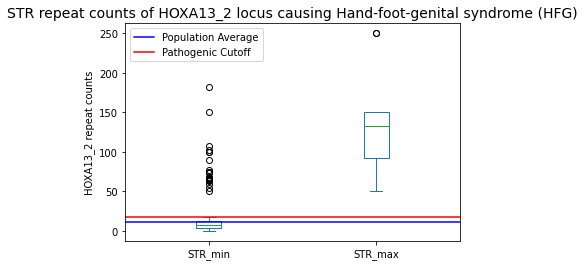

<Figure size 1080x1080 with 0 Axes>

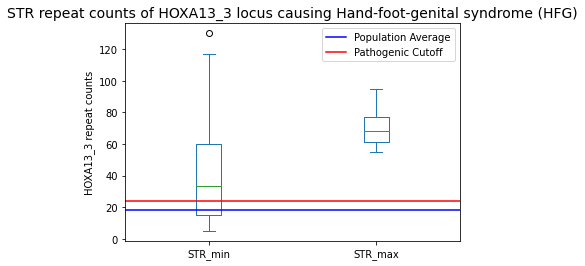

<Figure size 1080x1080 with 0 Axes>

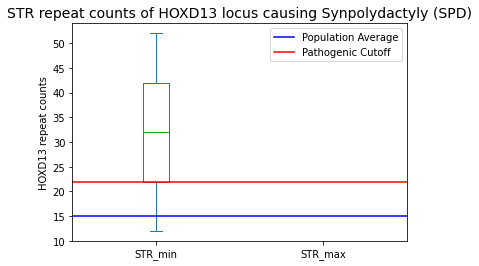

<Figure size 1080x1080 with 0 Axes>

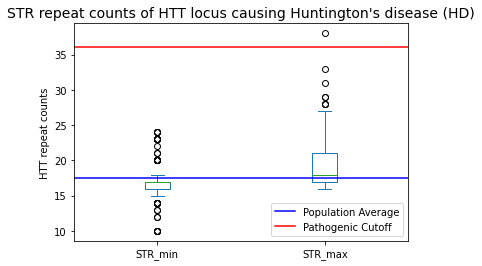

<Figure size 1080x1080 with 0 Axes>

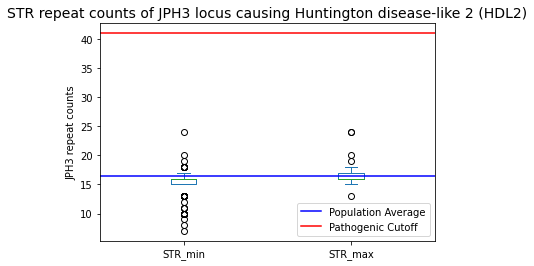

<Figure size 1080x1080 with 0 Axes>

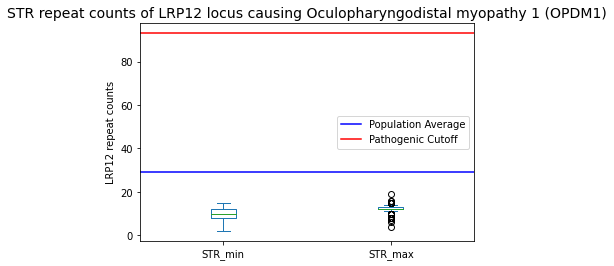

<Figure size 1080x1080 with 0 Axes>

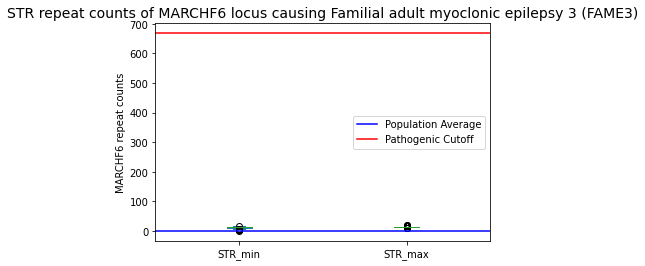

<Figure size 1080x1080 with 0 Axes>

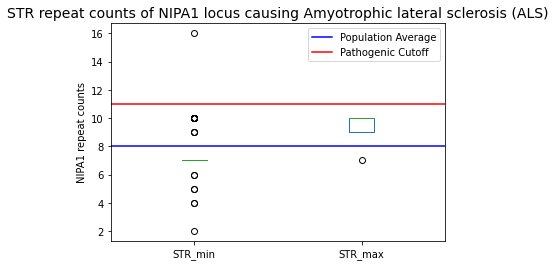

<Figure size 1080x1080 with 0 Axes>

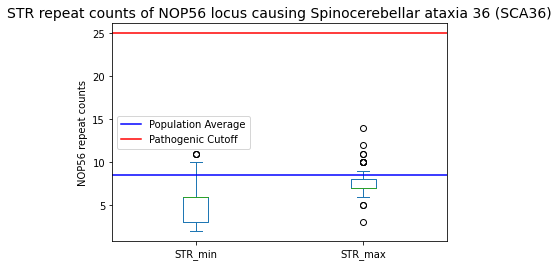

<Figure size 1080x1080 with 0 Axes>

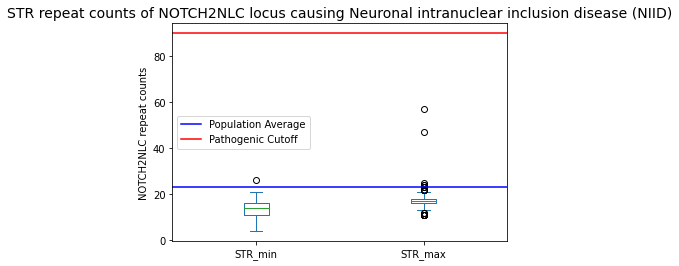

<Figure size 1080x1080 with 0 Axes>

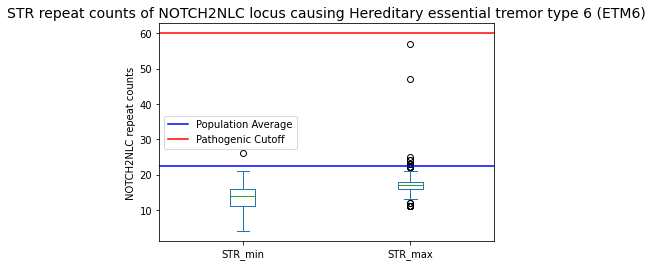

<Figure size 1080x1080 with 0 Axes>

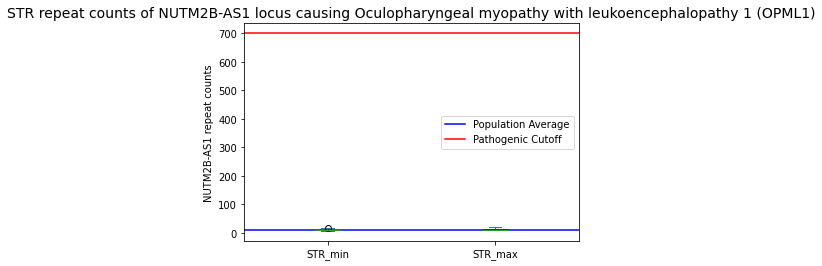

<Figure size 1080x1080 with 0 Axes>

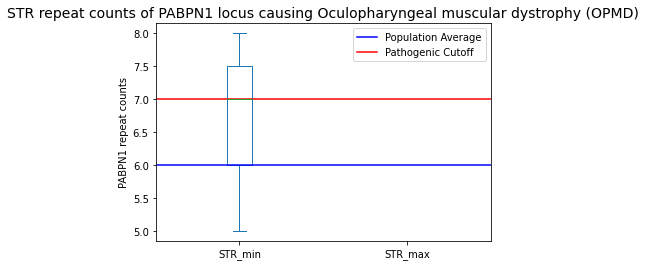

<Figure size 1080x1080 with 0 Axes>

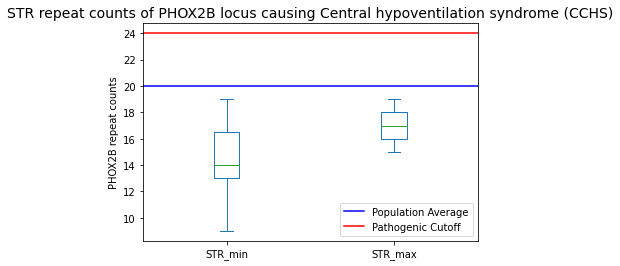

<Figure size 1080x1080 with 0 Axes>

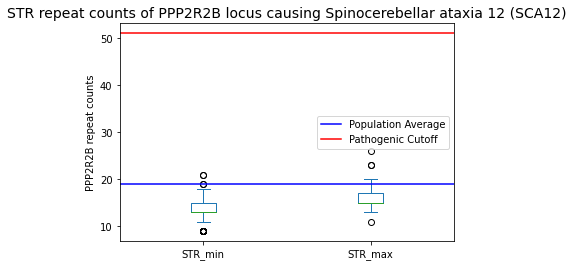

<Figure size 1080x1080 with 0 Axes>

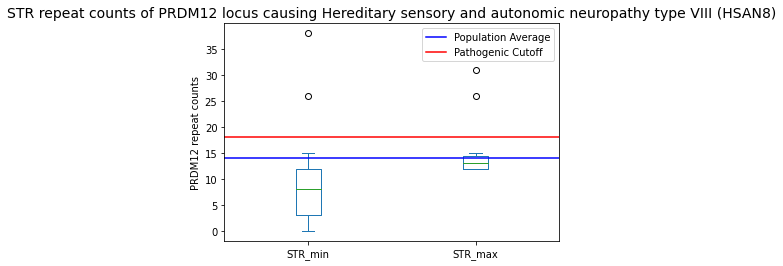

<Figure size 1080x1080 with 0 Axes>

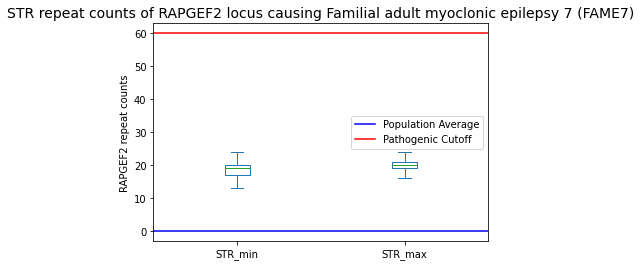

<Figure size 1080x1080 with 0 Axes>

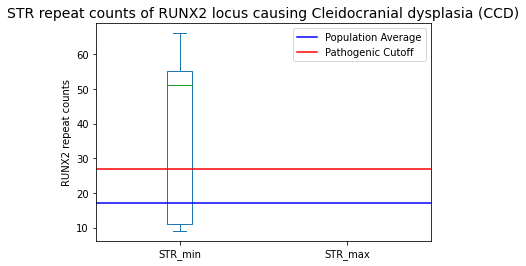

<Figure size 1080x1080 with 0 Axes>

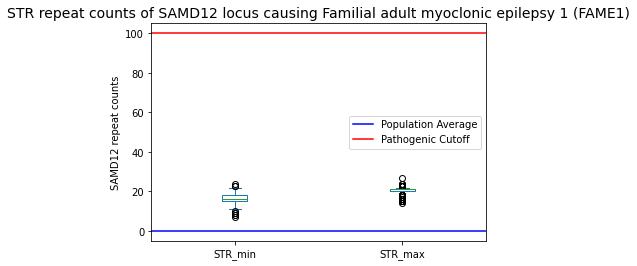

<Figure size 1080x1080 with 0 Axes>

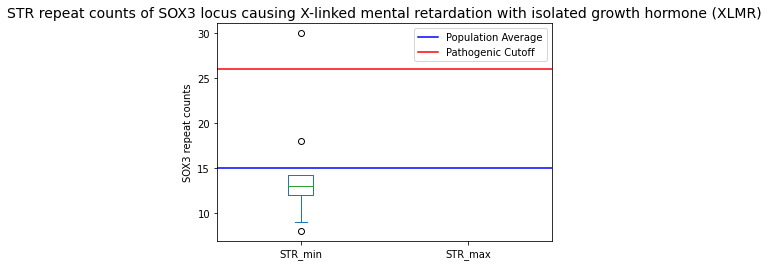

<Figure size 1080x1080 with 0 Axes>

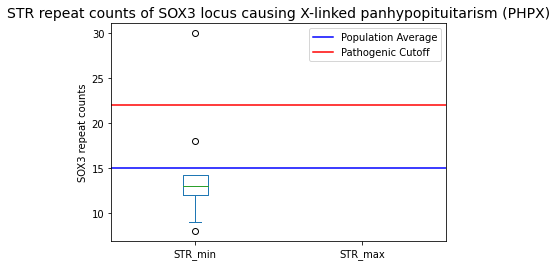

<Figure size 1080x1080 with 0 Axes>

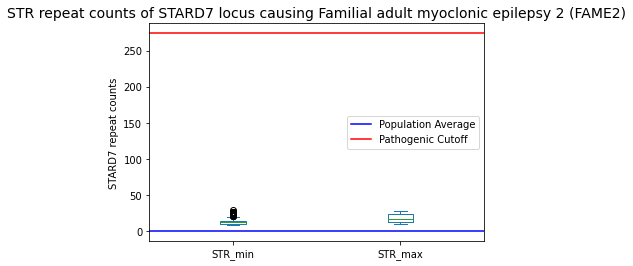

<Figure size 1080x1080 with 0 Axes>

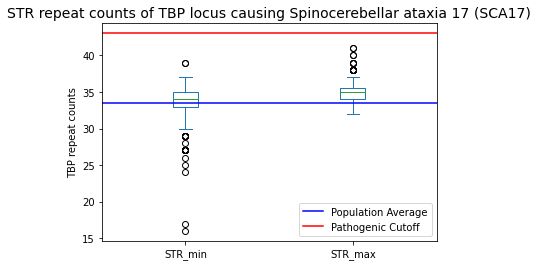

<Figure size 1080x1080 with 0 Axes>

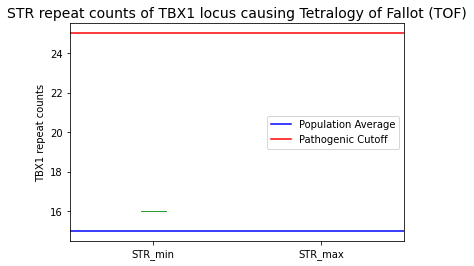

<Figure size 1080x1080 with 0 Axes>

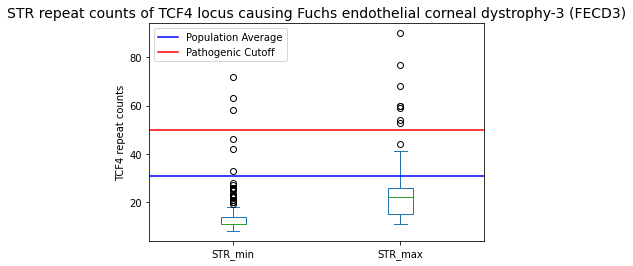

<Figure size 1080x1080 with 0 Axes>

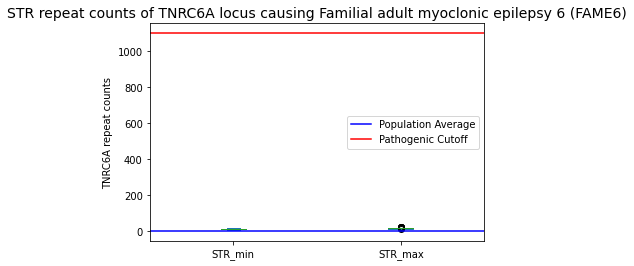

<Figure size 1080x1080 with 0 Axes>

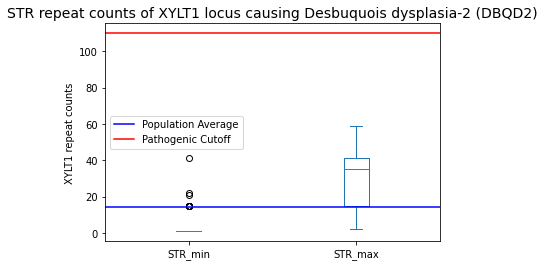

<Figure size 1080x1080 with 0 Axes>

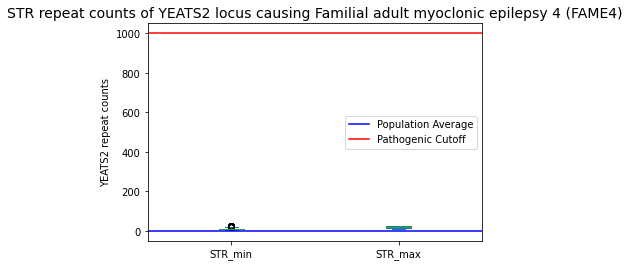

<Figure size 1080x1080 with 0 Axes>

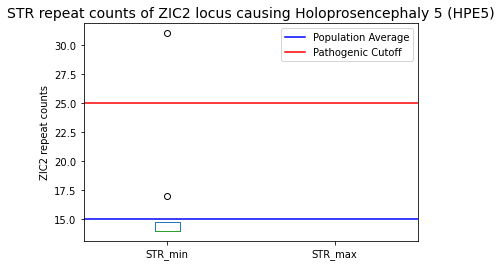

<Figure size 1080x1080 with 0 Axes>

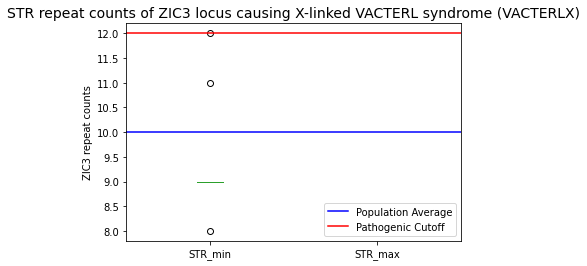

In [209]:
for index,value in eh_df_edited.iterrows():
    print(value['Locus'], value['Disease'], value['Pathogenic'], value['Normal_ave'] )
    plt.figure(figsize=(15,15))
    pd.DataFrame(df[df['Locus'] == value['Locus']][['STR_min', 'STR_max']]).plot(kind='box')
    plt.axhline(y = value['Normal_ave'], color = 'b', linestyle = '-', label= 'Population Average')
    plt.axhline(y = value['Pathogenic'], color = 'r', linestyle = '-', label= 'Pathogenic Cutoff')
    plt.title('STR repeat counts of {} locus causing {}'.format(value['Locus'], value['Disease']),fontsize = 14 )
    plt.ylabel('{} repeat counts'.format(value['Locus']))
    plt.legend()
    
    plt.savefig('{}_{}.jpg'.format(value['Locus'],value['Disease'].replace('/', '') ), dpi=250,bbox_inches='tight')
    
    
    